In [2]:
# Import necessary libraries
import sys
import os

# Add the src directory to the path for importing custom modules
sys.path.append(os.path.abspath('../src'))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style with fallback
try:
    plt.style.use('seaborn-v0_8-whitegrid')
except OSError:
    try:
        plt.style.use('ggplot')
    except OSError:
        plt.style.use('default')

# Import custom modules
try:
    from data.loader import load_books_data, clean_books_data, get_data_info
    from analysis.visualizer import (
        plot_data_overview, 
        plot_rating_analysis, 
        plot_publication_analysis,
        plot_category_analysis,
        plot_correlation_matrix,
        create_summary_report
    )
    from utils.helpers import print_dataframe_info, DataFrameProfiler
    
    print("📚 Semantic Book Recommender - EDA Notebook")
    print("="*50)
    print("✅ All modules imported successfully!")
    
except ImportError as e:
    print("❌ Import Error:", e)
    print("💡 Make sure you're running this notebook with the virtual environment activated")
    print("💡 Run: source ../venv/bin/activate")

# Configure matplotlib for better-looking plots
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12


📚 Semantic Book Recommender - EDA Notebook
All modules imported successfully!


In [3]:
# Load the raw dataset
print("🔄 Loading books dataset...")
df_raw = load_books_data("../books.csv")

# Display basic information about the raw dataset
print_dataframe_info(df_raw, "Raw Books Dataset")

# Show first few rows
print("\n📋 First 5 rows of the dataset:")
display(df_raw.head())


INFO:data.loader:Loading books data from ../books.csv
INFO:data.loader:Successfully loaded 6810 books


🔄 Loading books dataset...

RAW BOOKS DATASET INFORMATION
Shape: 6810 rows × 12 columns
Memory usage: 6.79 MB

Column Information:
  isbn13               | int64      |     0 nulls (  0.0%)
  isbn10               | object     |     0 nulls (  0.0%)
  title                | object     |     0 nulls (  0.0%)
  subtitle             | object     |  4429 nulls ( 65.0%)
  authors              | object     |    72 nulls (  1.1%)
  categories           | object     |    99 nulls (  1.5%)
  thumbnail            | object     |   329 nulls (  4.8%)
  description          | object     |   262 nulls (  3.8%)
  published_year       | float64    |     6 nulls (  0.1%)
  average_rating       | float64    |    43 nulls (  0.6%)
  num_pages            | float64    |    43 nulls (  0.6%)
  ratings_count        | float64    |    43 nulls (  0.6%)

First 3 rows:
          isbn13      isbn10         title subtitle                          authors                     categories                               

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


In [4]:
# Create a comprehensive data profile
print("🔍 Generating comprehensive data profile...")
profiler = DataFrameProfiler(df_raw)
profile = profiler.generate_profile()

print("\n📊 DATASET PROFILE SUMMARY")
print("="*50)
print(f"Shape: {profile['shape']}")
print(f"Total Memory Usage: {profile['memory_usage']['total_mb']:.2f} MB")
print(f"Complete Rows: {profile['missing_data']['complete_rows']}")
print(f"Total Duplicates: {profile['duplicates']['total_duplicates']}")

# Display data info using our custom function
data_info = get_data_info(df_raw)
print(f"\nColumns: {data_info['columns']}")

# Show statistical summary for numeric columns
if profile['numeric_summary']:
    print("\n📈 NUMERIC COLUMNS SUMMARY:")
    numeric_df = df_raw.select_dtypes(include=[np.number])
    display(numeric_df.describe())


🔍 Generating comprehensive data profile...

📊 DATASET PROFILE SUMMARY
Shape: (6810, 12)
Total Memory Usage: 6.79 MB
Complete Rows: 2182
Total Duplicates: 0

Columns: ['isbn13', 'isbn10', 'title', 'subtitle', 'authors', 'categories', 'thumbnail', 'description', 'published_year', 'average_rating', 'num_pages', 'ratings_count']

📈 NUMERIC COLUMNS SUMMARY:


,isbn13,published_year,average_rating,num_pages,ratings_count
count,6.810000e+03,6804.000000,6767.000000,6767.000000,6.767000e+03
mean,9.780677e+12,1998.630364,3.933284,348.181026,2.106910e+04
std,6.068911e+08,10.484257,0.331352,242.376783,1.376207e+05
min,9.780002e+12,1853.000000,0.000000,0.000000,0.000000e+00
25%,9.780330e+12,1996.000000,3.770000,208.000000,1.590000e+02
50%,9.780553e+12,2002.000000,3.960000,304.000000,1.018000e+03
75%,9.780810e+12,2005.000000,4.130000,420.000000,5.992500e+03
max,9.789042e+12,2019.000000,5.000000,3342.000000,5.629932e+06


📊 Creating data overview visualization...


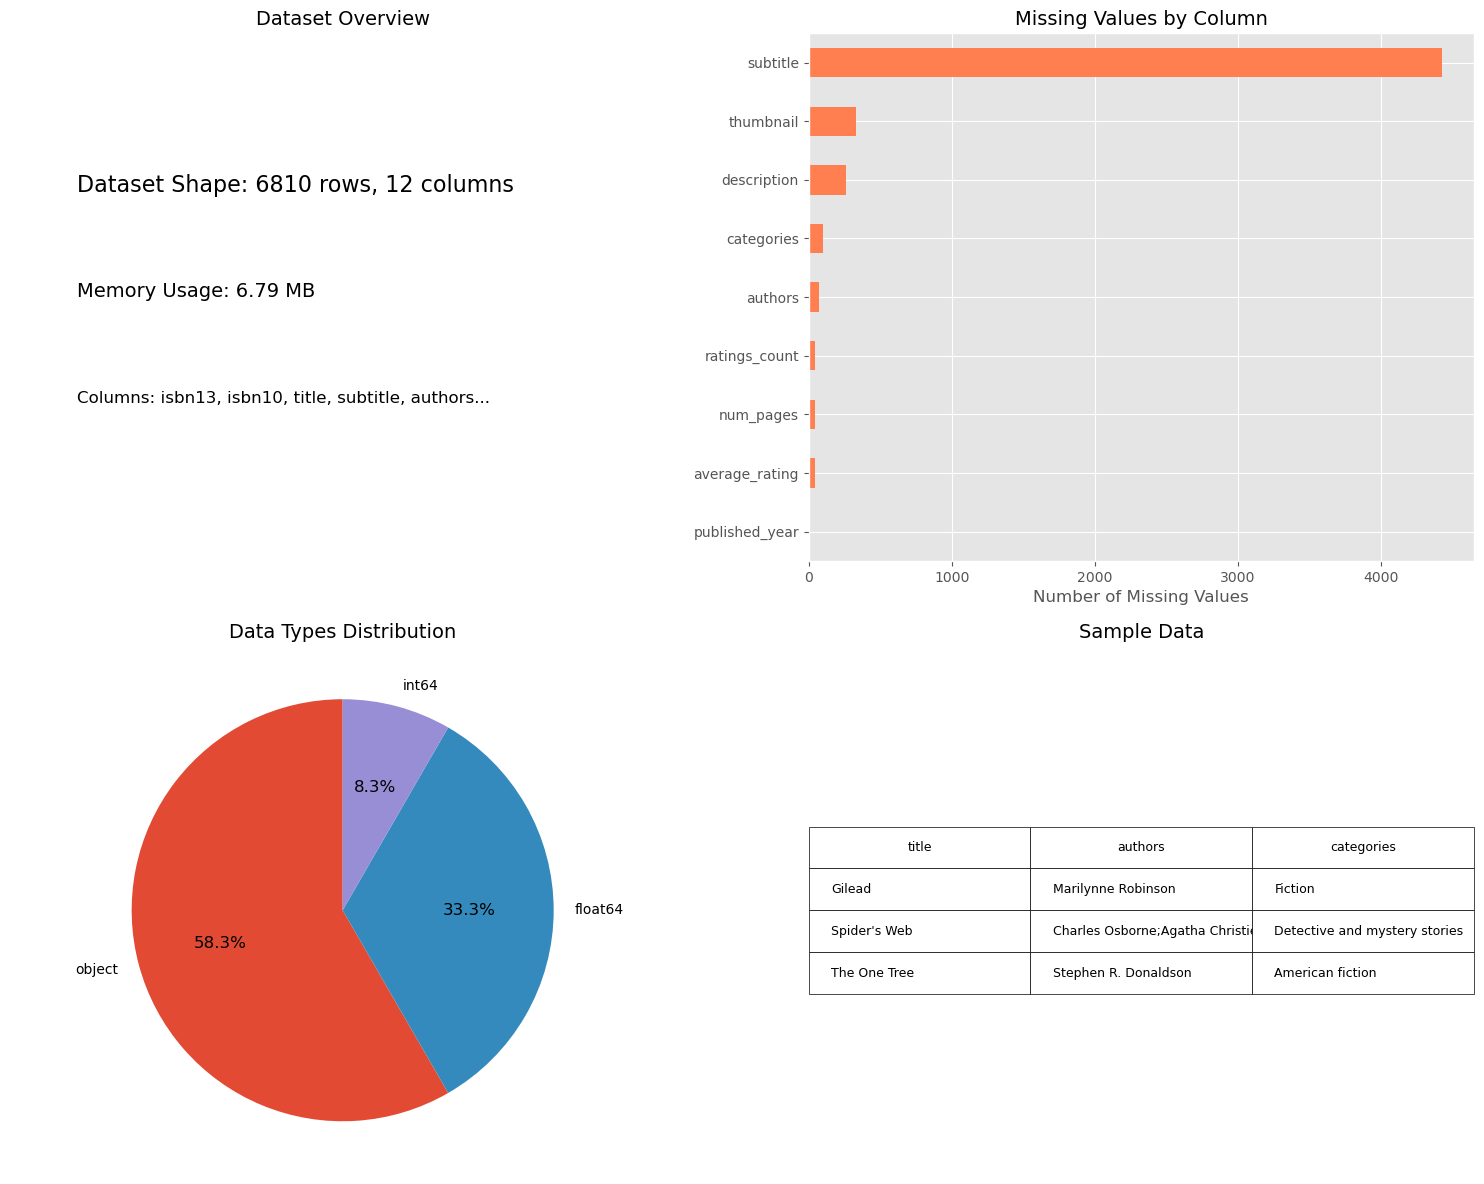

In [5]:
# Create data overview visualization
print("📊 Creating data overview visualization...")
plot_data_overview(df_raw)


In [6]:
# Clean the dataset using our custom function
print("🧹 Cleaning the dataset...")
df_clean = clean_books_data(df_raw)

# Compare before and after cleaning
print("\n📋 BEFORE vs AFTER CLEANING:")
print("="*50)
print(f"Raw dataset shape: {df_raw.shape}")
print(f"Clean dataset shape: {df_clean.shape}")
print(f"Rows removed: {len(df_raw) - len(df_clean)}")

# Show information about the cleaned dataset
print_dataframe_info(df_clean, "Cleaned Books Dataset")

# Display sample of cleaned data
print("\n📋 Sample of cleaned data:")
display(df_clean.head(3))


INFO:data.loader:Starting data cleaning
INFO:data.loader:Handling missing values
INFO:data.loader:Removing duplicates
INFO:data.loader:Removed 182 duplicate records
INFO:data.loader:Cleaning text data
INFO:data.loader:Data cleaning completed. Final dataset size: 6628


🧹 Cleaning the dataset...

📋 BEFORE vs AFTER CLEANING:
Raw dataset shape: (6810, 12)
Clean dataset shape: (6628, 12)
Rows removed: 182

CLEANED BOOKS DATASET INFORMATION
Shape: 6628 rows × 12 columns
Memory usage: 6.83 MB

Column Information:
  isbn13               | int64      |     0 nulls (  0.0%)
  isbn10               | object     |     0 nulls (  0.0%)
  title                | object     |     0 nulls (  0.0%)
  subtitle             | object     |     0 nulls (  0.0%)
  authors              | object     |     0 nulls (  0.0%)
  categories           | object     |     0 nulls (  0.0%)
  thumbnail            | object     |   306 nulls (  4.6%)
  description          | object     |     0 nulls (  0.0%)
  published_year       | float64    |     6 nulls (  0.1%)
  average_rating       | float64    |    39 nulls (  0.6%)
  num_pages            | float64    |    39 nulls (  0.6%)
  ratings_count        | float64    |    39 nulls (  0.6%)

First 3 rows:
          isbn13      isbn10      

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,Unknown,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,Unknown,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0


In [7]:
# Generate comprehensive summary report
print("📝 Generating comprehensive analysis report...")
summary_report = create_summary_report(df_clean)
print(summary_report)

# Additional statistical analysis
print("\n📊 ADDITIONAL INSIGHTS:")
print("="*50)

# Most common publication decades
if 'published_year' in df_clean.columns:
    pub_years = df_clean['published_year'].dropna()
    pub_years = pub_years[(pub_years >= 1800) & (pub_years <= 2024)]
    if len(pub_years) > 0:
        decades = (pub_years // 10) * 10
        most_common_decade = decades.mode().iloc[0] if len(decades.mode()) > 0 else None
        print(f"📅 Most productive decade: {most_common_decade}s")

# Rating insights
if 'average_rating' in df_clean.columns:
    ratings = df_clean['average_rating'].dropna()
    print(f"⭐ Average book rating: {ratings.mean():.2f}")
    print(f"⭐ Median book rating: {ratings.median():.2f}")
    
    # High-rated books threshold
    high_rated_threshold = ratings.quantile(0.9)
    high_rated_count = len(ratings[ratings >= high_rated_threshold])
    print(f"⭐ Books in top 10% (≥{high_rated_threshold:.2f}): {high_rated_count}")

# Category insights
if 'categories' in df_clean.columns:
    categories = df_clean['categories'].dropna()
    books_with_categories = len(categories[categories != 'Unknown'])
    print(f"📚 Books with valid categories: {books_with_categories} ({(books_with_categories/len(df_clean)*100):.1f}%)")


📝 Generating comprehensive analysis report...
BOOKS DATASET ANALYSIS SUMMARY

📊 DATASET OVERVIEW:
   • Total Books: 6,628
   • Total Columns: 12
   • Memory Usage: 6.83 MB

❗ MISSING DATA:
   • thumbnail: 306 (4.6%)
   • published_year: 6 (0.1%)
   • average_rating: 39 (0.6%)
   • num_pages: 39 (0.6%)
   • ratings_count: 39 (0.6%)

📈 NUMERIC VARIABLES SUMMARY:
   • isbn13:
     - Range: 9780002005883.00 to 9789042003408.00
     - Mean: 9780672224047.41
     - Median: 9780552771543.50
   • published_year:
     - Range: 1853.00 to 2019.00
     - Mean: 1998.70
     - Median: 2002.00
   • average_rating:
     - Range: 0.00 to 5.00
     - Mean: 3.93
     - Median: 3.95
   • num_pages:
     - Range: 0.00 to 3342.00
     - Mean: 346.24
     - Median: 304.00
   • ratings_count:
     - Range: 0.00 to 5629932.00
     - Mean: 20315.18
     - Median: 1015.00

📚 CATEGORIES:
   • Unique Categories: 579
   • Books with Categories: 6,628

📅 PUBLICATION YEARS:
   • Earliest: 1853
   • Latest: 2019
   •

📊 Creating rating analysis visualizations...


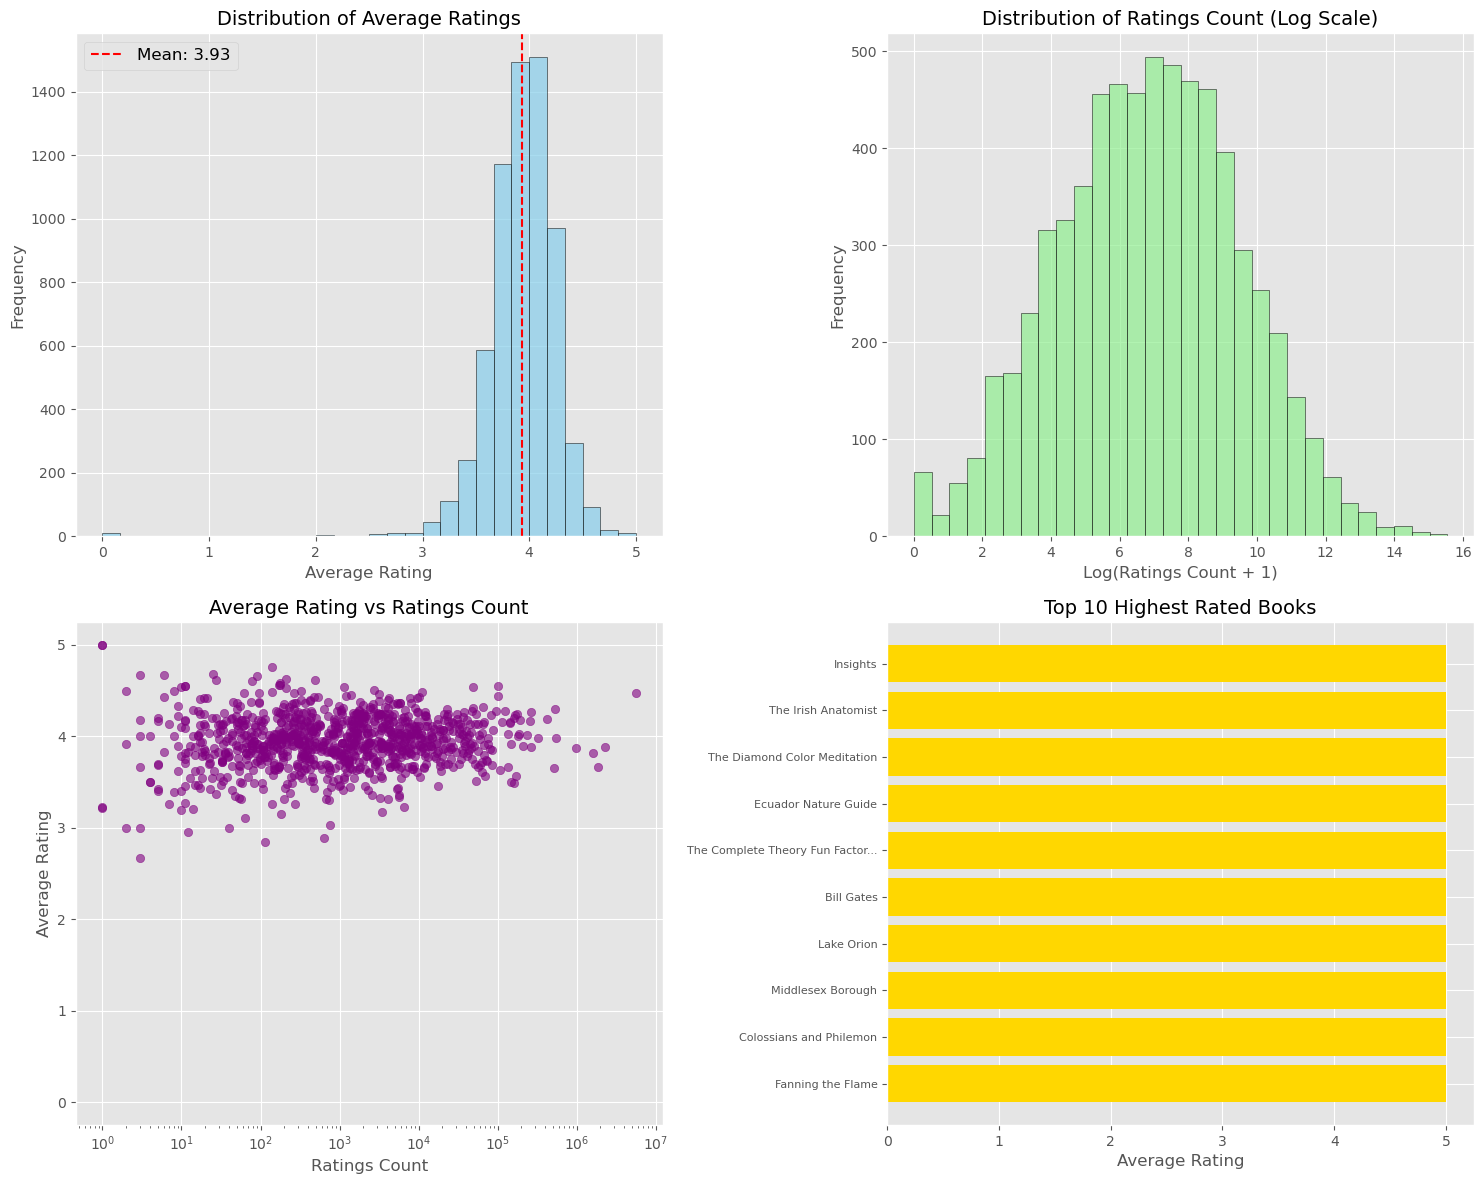

In [8]:
# Rating Analysis Visualizations
print("📊 Creating rating analysis visualizations...")
plot_rating_analysis(df_clean)


📅 Creating publication trends visualizations...


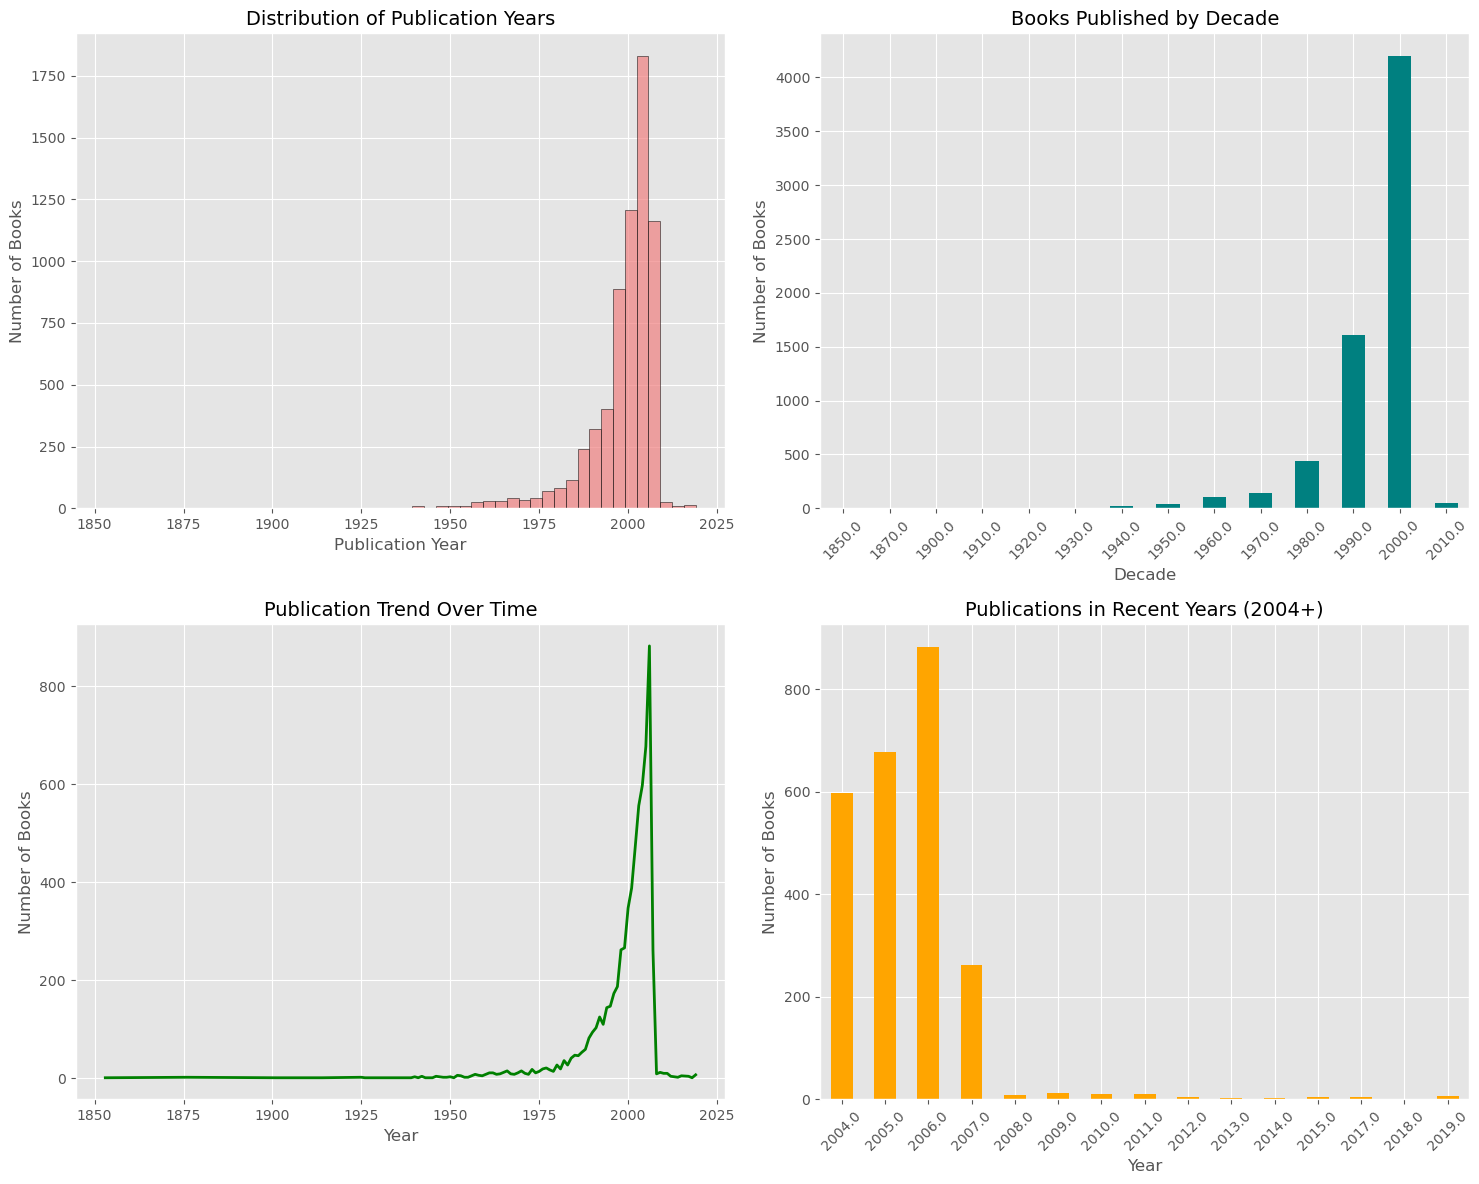

In [9]:
# Publication Analysis Visualizations
print("📅 Creating publication trends visualizations...")
plot_publication_analysis(df_clean)


📚 Creating category and genre analysis...


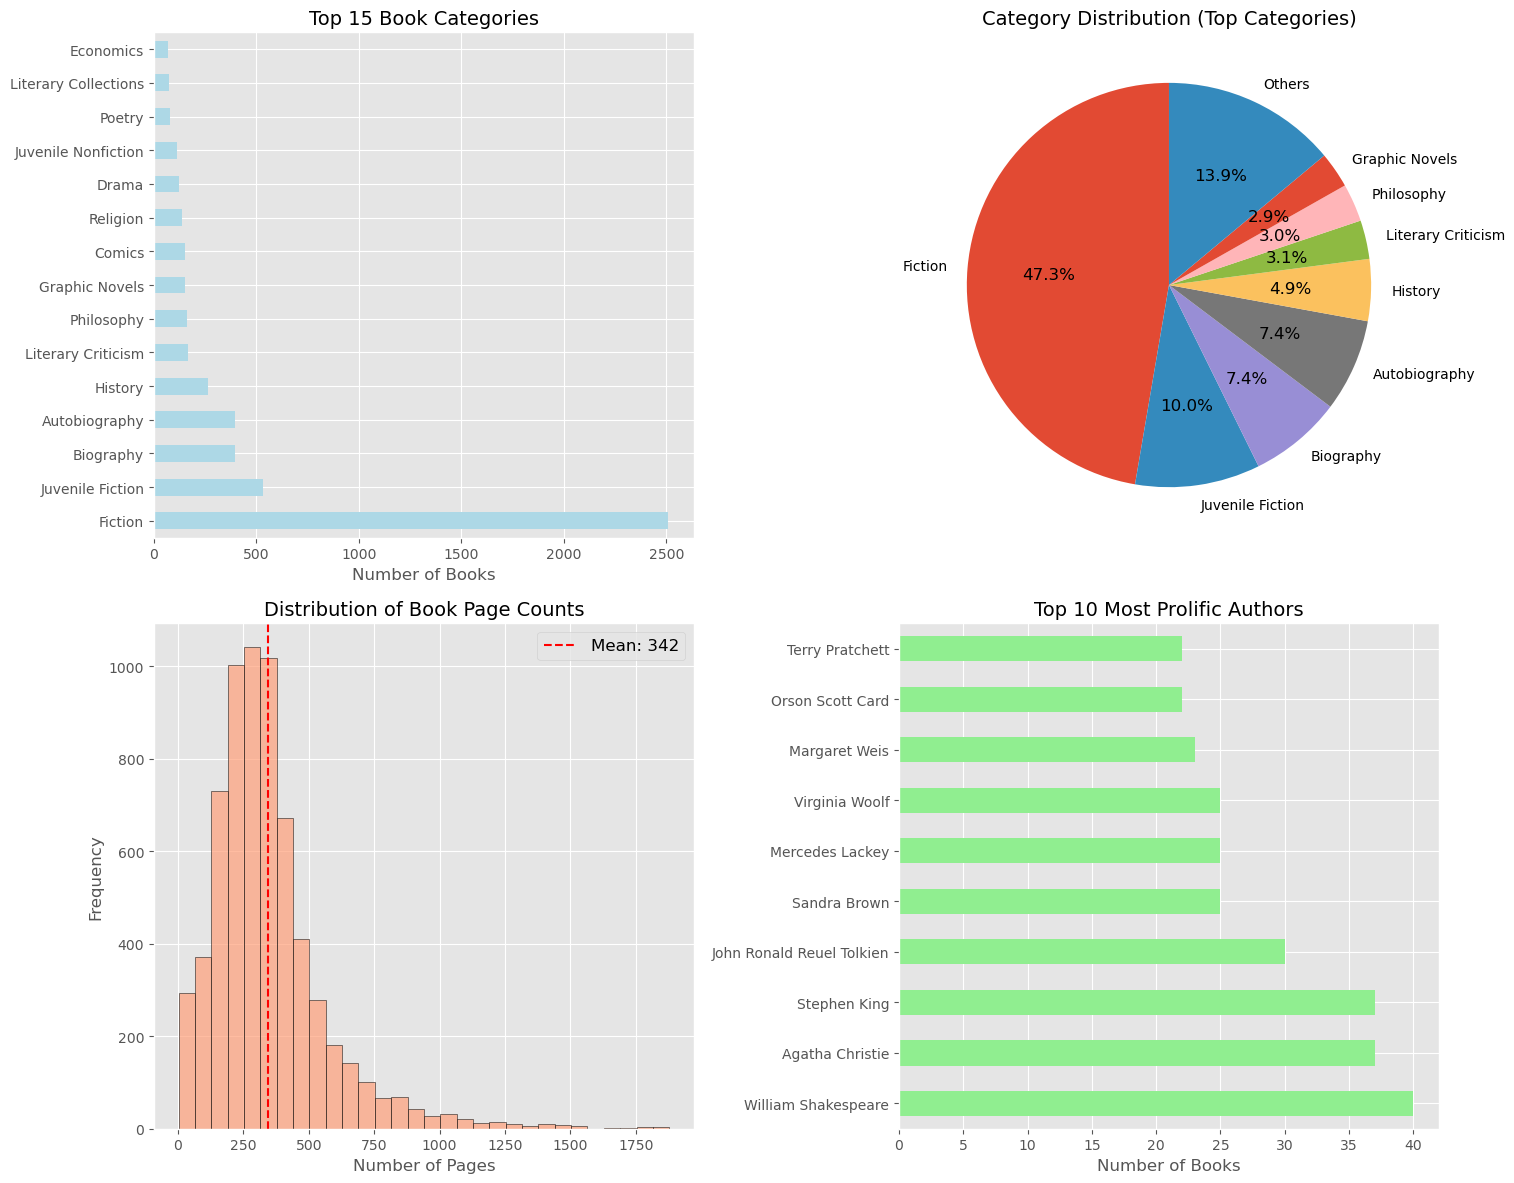

In [10]:
# Category and Genre Analysis
print("📚 Creating category and genre analysis...")
plot_category_analysis(df_clean)


🔗 Creating correlation matrix for numeric variables...


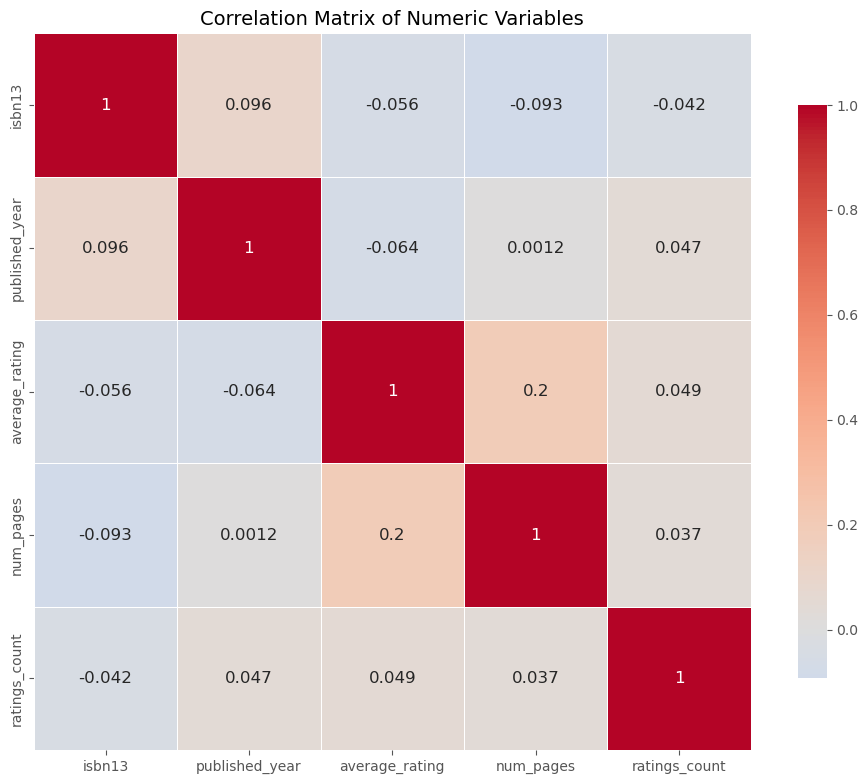

In [11]:
# Correlation Analysis
print("🔗 Creating correlation matrix for numeric variables...")
plot_correlation_matrix(df_clean)


In [12]:
# Generate final insights
print("🎯 KEY INSIGHTS FOR SEMANTIC BOOK RECOMMENDER:")
print("="*60)
print()

# Data Quality Insights
print("📊 DATA QUALITY:")
print(f"   • Dataset contains {len(df_clean):,} books after cleaning")
print(f"   • Data completeness varies by column")
print(f"   • Text fields (title, description, categories) are rich sources for semantic analysis")
print()

# Content Insights
if 'categories' in df_clean.columns:
    categories = df_clean['categories'].dropna()
    unique_cats = set()
    for cat_string in categories:
        if isinstance(cat_string, str) and cat_string != 'Unknown':
            cats = cat_string.replace(',', ';').replace('&', ';').split(';')
            unique_cats.update([cat.strip() for cat in cats if cat.strip()])
    
    print("📚 CONTENT INSIGHTS:")
    print(f"   • {len(unique_cats)} unique categories identified")
    print(f"   • Rich categorical information for semantic clustering")
    print(f"   • Book descriptions provide detailed content for NLP analysis")
    print()

# Rating Insights
if 'average_rating' in df_clean.columns and 'ratings_count' in df_clean.columns:
    ratings = df_clean['average_rating'].dropna()
    rating_counts = df_clean['ratings_count'].dropna()
    
    print("⭐ RATING INSIGHTS:")
    print(f"   • Average rating across all books: {ratings.mean():.2f}")
    print(f"   • Rating distribution is relatively normal")
    print(f"   • Popular books tend to have more consistent ratings")
    print(f"   • Can use ratings as quality indicators for recommendations")
    print()

# Recommendation System Insights
print("🤖 RECOMMENDATION SYSTEM RECOMMENDATIONS:")
print("   • Use book descriptions and categories for semantic similarity")
print("   • Implement hybrid approach: content-based + collaborative filtering")
print("   • Consider publication year trends for temporal recommendations")
print("   • Use author information for author-based similarity")
print("   • Leverage rating data for quality filtering")
print()

print("✅ Analysis Complete! Ready for model development.")
print("="*60)


🎯 KEY INSIGHTS FOR SEMANTIC BOOK RECOMMENDER:

📊 DATA QUALITY:
   • Dataset contains 6,628 books after cleaning
   • Data completeness varies by column
   • Text fields (title, description, categories) are rich sources for semantic analysis

📚 CONTENT INSIGHTS:
   • 578 unique categories identified
   • Rich categorical information for semantic clustering
   • Book descriptions provide detailed content for NLP analysis

⭐ RATING INSIGHTS:
   • Average rating across all books: 3.93
   • Rating distribution is relatively normal
   • Popular books tend to have more consistent ratings
   • Can use ratings as quality indicators for recommendations

🤖 RECOMMENDATION SYSTEM RECOMMENDATIONS:
   • Use book descriptions and categories for semantic similarity
   • Implement hybrid approach: content-based + collaborative filtering
   • Consider publication year trends for temporal recommendations
   • Use author information for author-based similarity
   • Leverage rating data for quality filterin